<h1>Приоритизация гипотез и анализ А/В теста<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1">Введение</a></span></li><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-2">Приоритизация гипотез.</a></span><ul class="toc-item"><li><span><a href="#Метод-ICE" data-toc-modified-id="Метод-ICE-2.1">Метод ICE</a></span></li><li><span><a href="#Метод-RICE" data-toc-modified-id="Метод-RICE-2.2">Метод RICE</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3">Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивные-метрики" data-toc-modified-id="Кумулятивные-метрики-3.1">Кумулятивные метрики</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка" data-toc-modified-id="Кумулятивная-выручка-3.1.1">Кумулятивная выручка</a></span></li><li><span><a href="#Кумулятивный-средний-чек" data-toc-modified-id="Кумулятивный-средний-чек-3.1.2">Кумулятивный средний чек</a></span></li><li><span><a href="#Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивного-среднего-чека-группы-B-к-группе-A-3.1.3">Относительное изменение кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#Кумулятивная-конверсия" data-toc-modified-id="Кумулятивная-конверсия-3.1.4">Кумулятивная конверсия</a></span></li><li><span><a href="#Относительное-изменение-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="Относительное-изменение-кумулятивной-конверсии-группы-B-к-группе-A-3.1.5">Относительное изменение кумулятивной конверсии группы B к группе A</a></span></li></ul></li><li><span><a href="#Анализ-выбросов-и-всплесков:-крайние-значения-данных" data-toc-modified-id="Анализ-выбросов-и-всплесков:-крайние-значения-данных-3.2">Анализ выбросов и всплесков: крайние значения данных</a></span></li><li><span><a href="#Расчет-статистической-значимости" data-toc-modified-id="Расчет-статистической-значимости-3.3">Расчет статистической значимости</a></span><ul class="toc-item"><li><span><a href="#Конверсия-по-&quot;сырым&quot;-данным" data-toc-modified-id="Конверсия-по-&quot;сырым&quot;-данным-3.3.1">Конверсия по "сырым" данным</a></span></li><li><span><a href="#Средний-чек-по-&quot;сырым&quot;-данным" data-toc-modified-id="Средний-чек-по-&quot;сырым&quot;-данным-3.3.2">Средний чек по "сырым" данным</a></span></li><li><span><a href="#Конверсия-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Конверсия-по-&quot;очищенным&quot;-данным-3.3.3">Конверсия по "очищенным" данным</a></span></li><li><span><a href="#Средний-чек-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Средний-чек-по-&quot;очищенным&quot;-данным-3.3.4">Средний чек по "очищенным" данным</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4">Вывод</a></span></li></ul></li></ul></div>

## Введение

Совместно с отделом маркетинга подготовен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

В наличии имеются три датасета.  

Для проверки гипотез  - файл **/datasets/hypothesis.csv**.  

Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Для А/В теста:
1) **файл /datasets/orders.csv**.  

transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.    

2) **файл /datasets/visitors.csv**.  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

## Приоритизация гипотез.

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import datetime as dt

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Метод ICE

 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']

In [7]:
data.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


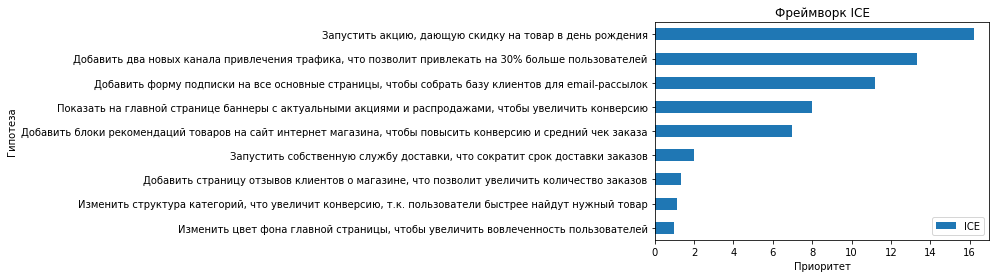

In [8]:
ax = data[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('Фреймворк ICE')
plt.show()

В соответствии с методом ICE топ- гипотез, над которыми стоит сосредоточиться:  
8 - Запустить акцию, дающую скидку на товар в день рождения;  
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;  
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Метод RICE

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [9]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']

In [10]:
data.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


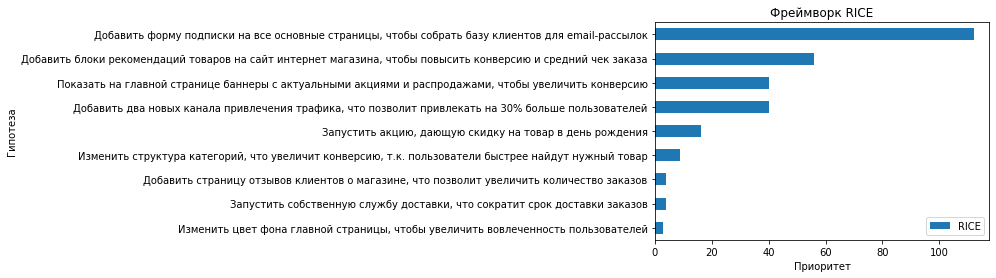

In [11]:
ax = data[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('Фреймворк RICE')
plt.show()

В соответствии с методом RICE топ перспективных гипотез изменился:  
7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;  
2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;  
0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Из приоритетеного списка исключилась гипотеза 8, касающаяся предоставления скидки в день рождения. Охват пользователей по данной гипотезе ниже, чем у остальных - 1. Это вытекает из сути гипотезы, где охваченными оказываются пользователи, у которых на период тестирования придется дата рождения.

### Вывод  
С учетом данных, полученных методами ICE и RICE, наиболее перспективными следует считать гипотезы 7 и 0 и сосредоточиться на их тестировании в первую очередь.

## Анализ A/B-теста

In [12]:
orders = pd.read_csv('/datasets/orders.csv')

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [16]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим, есть ли в таблице orders пользователи, которые попали в обе группы тестирования А и В.

In [20]:
orders_double_group = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index()
orders_double_group = orders_double_group.loc[orders_double_group['group'] > 1]
#orders_double_group.columns
orders_double_group['group'].count()

58

In [21]:
orders.shape

(1197, 5)

In [22]:
'Доля пользователей с неуникальной группой теста: {:.1%}'.format(orders_double_group['group'].count() / orders.shape[0])

'Доля пользователей с неуникальной группой теста: 4.8%'

В таблице orders 58 (4,8%) пользователей, для которых группа теста не уникальна. Это достаточно большой процент, чтобы с настороженностью отнеосится к результатам.

### Кумулятивные метрики

Соберем кумулятивные данные. Объявим датафрейм cumulativeDataсо столбцами:
- date— дата;
- group— группа A/B-теста (A или B);
- orders— кумулятивное количество заказов на указанную дату в указанной группе;
- buyers— кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue— кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors— кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
#datesGroups

Соберём агрегированные кумулятивные по дням данные о заказах.  
Создадим таблицу ordersAggregated, содержащую:
* дату;
* группу A/B-теста;
* число уникальных заказов в группе теста по указанную дату включительно;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [25]:
ordersAggregated.head(10)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.  
Создадим таблицу visitorsAggregated, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно

In [26]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
visitorsAggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


Объединим обе таблицы в одну - объявим датафрейм cumulativeDataсо столбцами:
- date— дата;
- group— группа A/B-теста (A или B);
- orders— кумулятивное количество заказов на указанную дату в указанной группе;
- buyers— кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue— кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors— кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [28]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [29]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Кумулятивная выручка

Построим график кумулятивной выручки по группам.

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

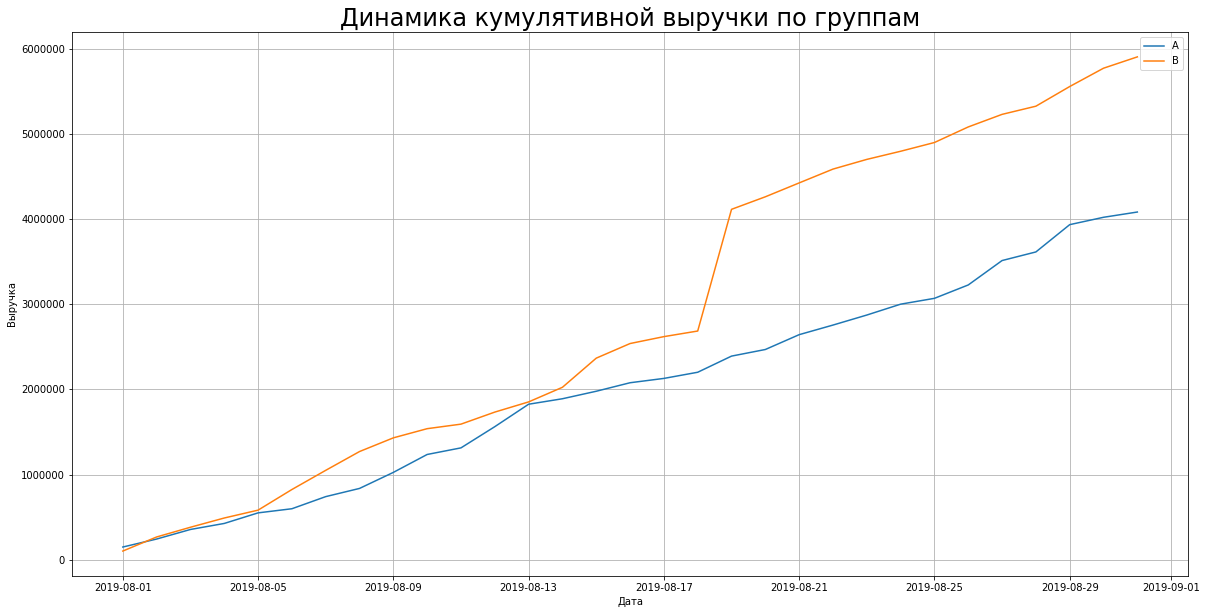

In [32]:
plt.figure(figsize=(20,10))
plt.grid()
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Динамика кумулятивной выручки по группам', size = 24)
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend()
plt.show()

Выручка растет для обеих групп на протяжении всего периода тестирования. График выручки группы B  резко растет 19.08.2019. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### Кумулятивный средний чек

Построим график кумулятивного среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

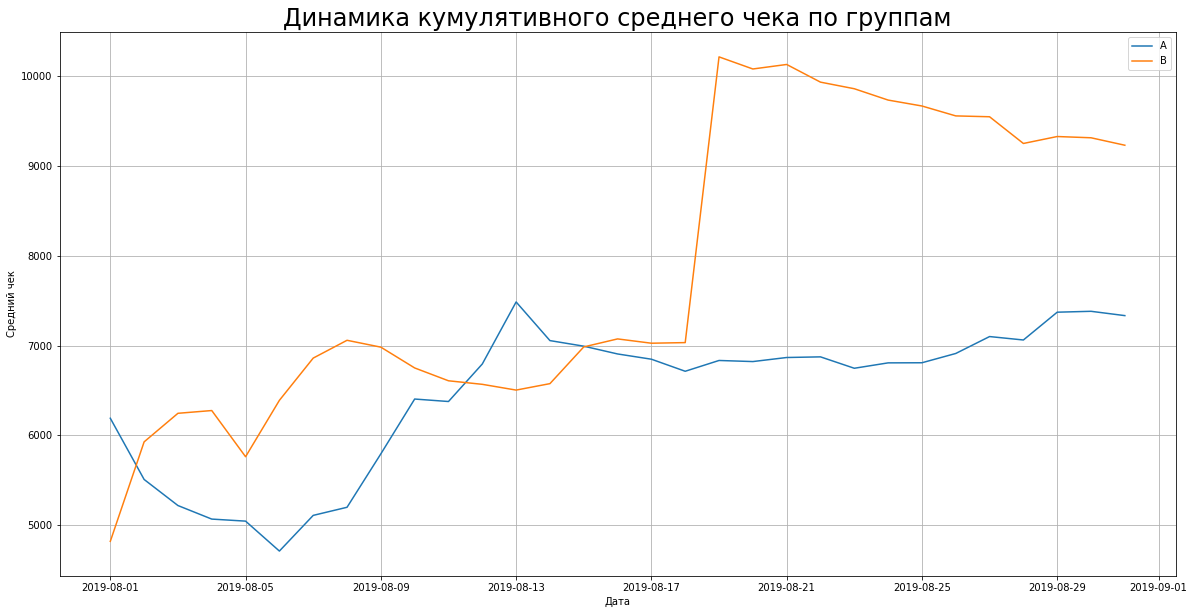

In [33]:
plt.figure(figsize=(20,10))
plt.grid()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Динамика кумулятивного среднего чека по группам', size = 24)
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend()
plt.show()

Период тестирования до 15.08.2019 характеризуется резкими скачками размера среднего чека для обеих групп. Для группы В резкий рост выручки 19.08.2019 сопровождается резким увеличением среднего чека. Это требует дополнительного анализа выбросов.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

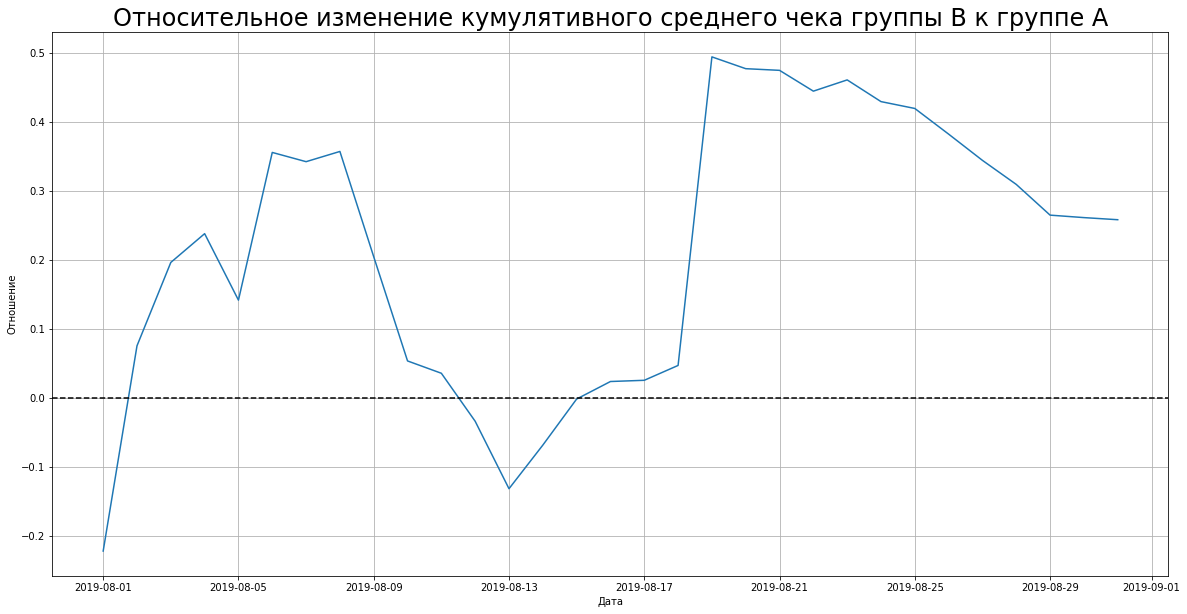

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,10))
plt.grid()
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', size = 24)
plt.xlabel("Дата")
plt.ylabel("Отношение")

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.show()


Кумулятивный средний чек группы B в подавлящем большинстве случаев больше кумулятивного среднего чека группы А. Вместе с тем различие чеков местами резко скачет. Что требует дооплнительного анализа крупных заказов и выбросов.

#### Кумулятивная конверсия

Построим график кумулятивной конверсии по группам.

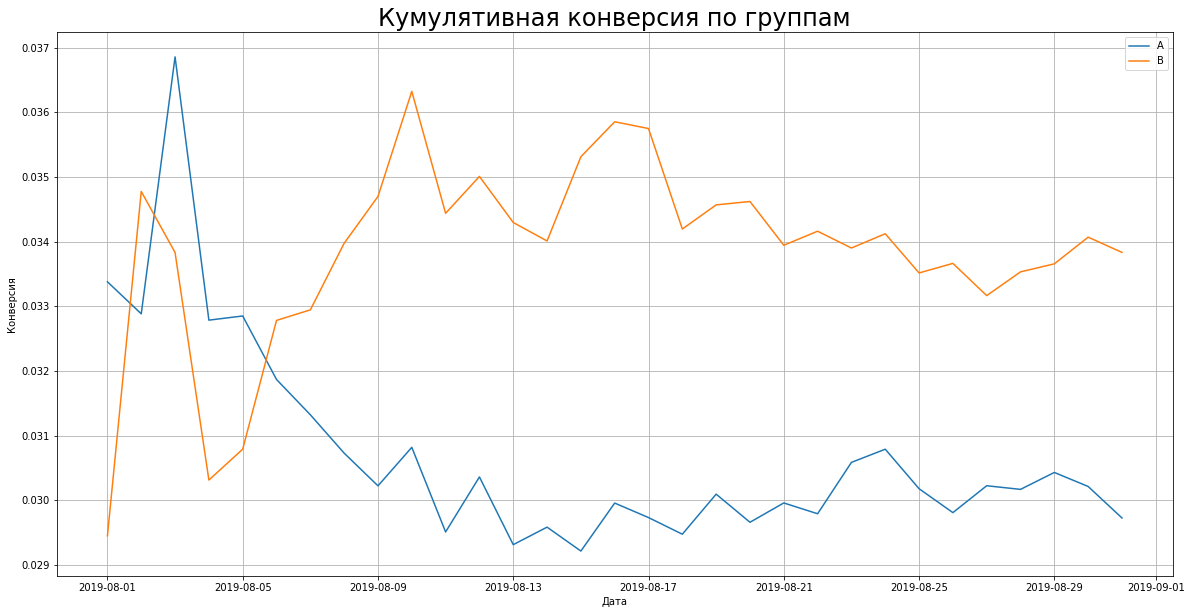

In [35]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам', size = 24)
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend()
plt.show()

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-08-31', 0, 0.015]) 

До 05.08.2019 конверсия обеих групп испытывала серьзеные колебания, при этом конверсия группы А опережала конверсию группы В. С 05.08.2019 конверсия группы А снижается, конверсия группы В растет и опережает конверсию группы А.

#### Относительное изменение кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

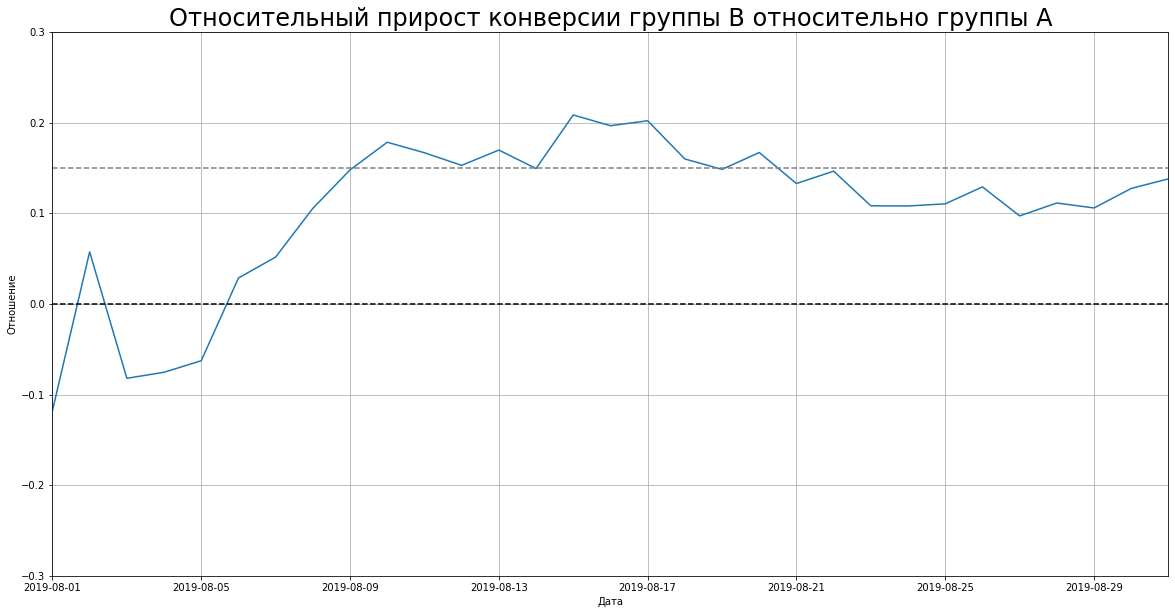

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,10))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A', size = 24)
plt.xlabel("Дата")
plt.ylabel("Отношение")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3]) 
plt.show()

В начале теста до 06.08.2019 группа В проигрывала по конверсии группе А, но затем вырвалась вперед.

### Анализ выбросов и всплесков: крайние значения данных

Подсчитаем количество заказов по пользователям и построим точечный график.

In [37]:
ordersByUsers = (
    orders.drop(['date', 'revenue', 'group'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

In [38]:
ordersByUsers['orders'].describe()

count   1,031.00
mean        1.16
std         0.72
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        11.00
Name: orders, dtype: float64

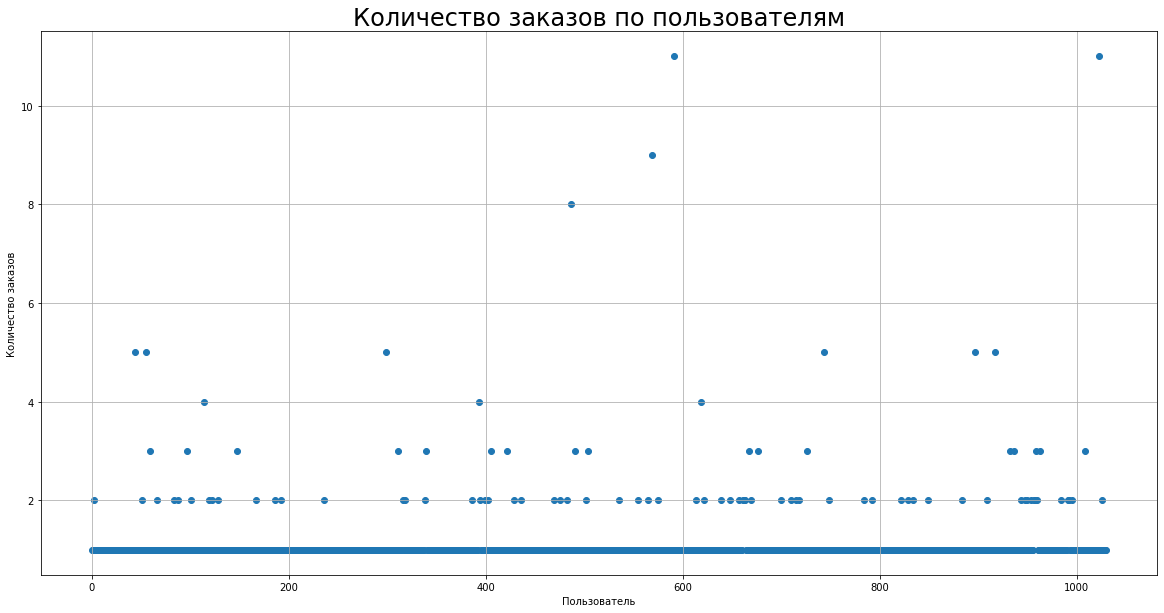

In [39]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(20,10))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям', size = 24)
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')

plt.show()

Исходя из графика подавляющее большинство пользователей с 1-2 заказами.

Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [40]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более чем 5% пользователей оформляли более 2 заказов. Не более 1% пользователей оформили более 4 заказов.  
Разумно выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Построим точечный график стоимостей заказов.

In [41]:
print(orders.sort_values(by='revenue', ascending=False).head(10))


      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


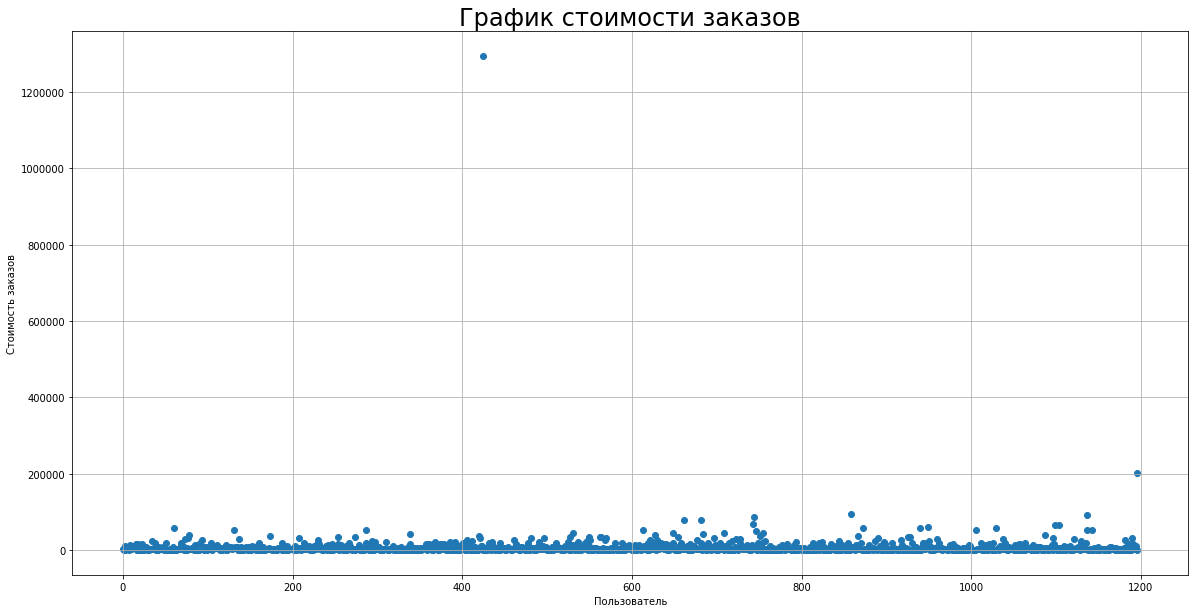

In [42]:

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов', size = 24)
plt.xlabel('Пользователь')
plt.ylabel('Стоимость заказов')

plt.show()



На графике четко прослеживаются два выброса - стоимость заказа 200 тыс. и 1 300 тыс. Заказ на сумму 1,3 млн. объясняет скачок на графике выручки 19.08.2019.

Посчитаем 95-й и 99-й перцентили стоимости заказов

In [43]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более чем 5% пользователей оформляли заказ на сумму выше 28 тыс. Не более 1% пользователей оформили заказ на сумму 58,2 тыс.
Целесообразно выбрать сумму 40 000  за нижнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

### Расчет статистической значимости

#### Конверсия по "сырым" данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Подготовим данные.

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [45]:
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [46]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [47]:
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [48]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]



In [49]:
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [50]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [51]:
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Сформируем датафрейм, где:  
- date— дата;
- ordersPerDateA— количество заказов в выбранную дату в группе A;
- revenuePerDateA— суммарная выручка в выбранную дату в группе A;
- ordersPerDateB— количество заказов в выбранную дату в группе B;
- revenuePerDateB— суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA— суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA— суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB— суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB— суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA— количество пользователей в выбранную дату в группе A;
- visitorsPerDateB— количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA— количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB— количество пользователей до выбранной даты включительно в группе B.

In [52]:
orders_per_date = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [53]:
orders_per_date.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersAи ordersByUsersBсо столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [54]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

In [55]:
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [56]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [57]:
ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleAи sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Переменная sampleA должна состоять из двух частей:
1. Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
2. Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: orders_per_date['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). 

In [58]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(orders_per_date['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [59]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Аналогично sampleA сформируем переменную sampleB.

In [60]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(orders_per_date['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [61]:
sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

H0: Конверсия в группе A равна конверсии в группе B.  
H1: Конверсия в группе A не равна конверсии в группе B

In [62]:
alpha=0.05
results_conv = st.mannwhitneyu(sampleA, sampleB,True,'two-sided')
print("p-значение: {0:.3f}".format(results_conv.pvalue))
if results_conv.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение: 0.017
Отвергаем нулевую гипотезу: разница статистически значима


Анализ "сырых" данных показывает, что в конверсии групп А и В есть статистически значимые различия.

In [63]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


Относительный выигрыш в конверсии группы В - 13,8%.

#### Средний чек по "сырым" данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

H0: Средний чек A равен среднему чеку группы B.  
H1: Средний чек A не равен среднему чеку группы B.

In [64]:
alpha=0.05
results_rev = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')
print("p-значение: {0:.3f}".format(results_rev.pvalue))
if results_rev.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

In [65]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

In [66]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [67]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.259


Средний чек группы B по "сырым" данным значительно выше среднего чека группы A - на 25,9%.

#### Конверсия по "очищенным" данным

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Найденные в рамках анализа выбросов и всплесков 95-й и 99-й перцентили средних чеков равны 28000 и   58233.2. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.  

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.   

Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 40 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [68]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)

In [69]:
usersWithManyOrders

227    2038680547
278    2458001652
499    4256040402
326    2378935119
340    2458001652
Name: visitorId, dtype: int64

In [70]:
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']

In [71]:
usersWithExpensiveOrders.head()

60     4256040402
78     3288820196
131    2254586615
287    2254456485
339     834731816
Name: visitorId, dtype: int64

In [72]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [73]:
abnormalUsers.head()

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
Name: visitorId, dtype: int64

In [74]:
abnormalUsers.shape

(29,)

29 аномальных пользователей.

Для расчета статистической значимости конверсии подготовим выборки количества заказов по пользователям по группам теста.

In [75]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                orders_per_date['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [76]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                orders_per_date['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

H0: Конверсия в группе A равна конверсии в группе B.  
H1: Конверсия в группе A не равна конверсии в группе B

In [77]:
alpha=0.05
results_conv_filt = st.mannwhitneyu(sampleAFiltered, sampleBFiltered,True,'two-sided')
print("p-значение: {0:.3f}".format(results_conv_filt.pvalue))
if results_conv_filt.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение: 0.010
Отвергаем нулевую гипотезу: разница статистически значима


Результаты по конверсии практически не изменились. В конверсии групп А и В есть статистически значимые различия.

In [78]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.166


Относительный выигрыш в конверсии группы В - 16,6%.

#### Средний чек по "очищенным" данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

H0: Средний чек A равен среднему чеку группы B.  
H1: Средний чек A не равен среднему чеку группы B.

In [79]:
alpha=0.05
results_rev_filt = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        True, 'two-sided')
print("p-значение: {0:.3f}".format(results_rev_filt.pvalue))
if results_rev_filt.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение: 0.612
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [80]:
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.069


P-value уменьшился, разница между сегментами сократилась с 25% до 7%. Общие выводы по результатам теста не изменились.

### Вывод

Имеющиеся факты:
- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, результат зафиксировался:
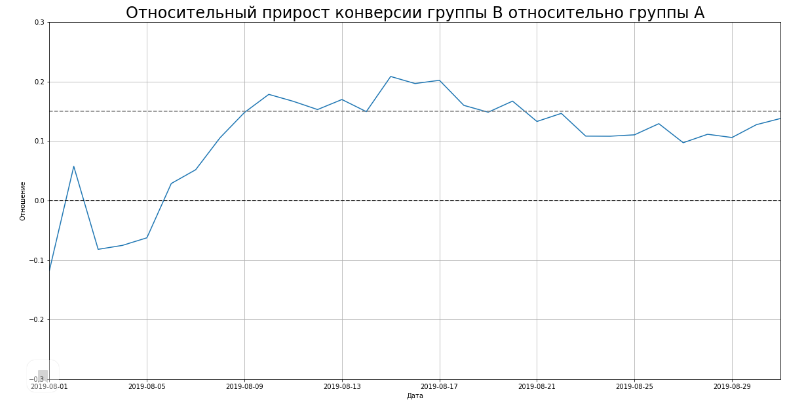
- График различия среднего чека говорит о том, что результаты группы B лучше группы A:
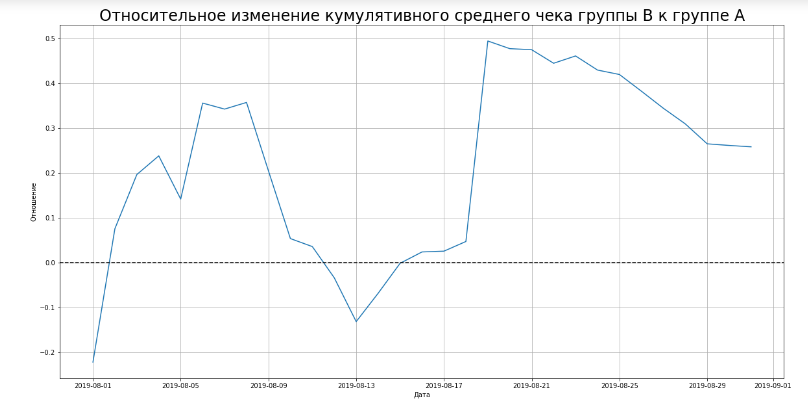
Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В.